In [1]:
# basic_example.ipynb
# Authors: Stephan Meighen-Berger
# Basic Example how to use the detector simulations

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

# Module
from detectorexample import DetectorExample, config

In [3]:
EventGenerator = DetectorExample()

Setting up the seed
Random Parameters
Setting up the detector
Setting up the neutrino flux
Preliminary rates


/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:184: RuntimeWarning: invalid value encountered in double_scalars
  em_fraction_sd = sigma0 * np.log(E)**(-gamma)
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:359: RuntimeWarning: invalid value encountered in double_scalars
  a = a_pars[0] * (np.log(E))**a_pars[1]
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:360: RuntimeWarning: invalid value encountered in double_scalars
  b = b_pars[0] * (np.log(E))**b_pars[1]
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:361: RuntimeWarning: invalid value encountered in double_scalars
  c = c_pars[0] * (np.log(E))**c_pars[1]
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:362: RuntimeWarning: invalid value encountered in double_scalars

In [4]:
rng = np.random.RandomState(1337)
# Generating events
spatial_samples_CC, timing_samples_CC, cuts_CC = EventGenerator.event_generator(
    EventGenerator._rates['NuE CC'][EventGenerator._e_cut[0]:EventGenerator._e_cut[1]],
    rng, 'CC'
)

spatial_samples_NC, timing_samples_NC, cuts_NC = EventGenerator.event_generator(
    (EventGenerator._rates['NuE NC'] + EventGenerator._rates['NuMu NC'])[EventGenerator._e_cut[0]:EventGenerator._e_cut[1]],
    rng, 'NC'
)

In [5]:
# Total counts
CC_counts = np.array([
    np.sum(cut_e) for cut_e in cuts_CC
])
NC_counts = np.array([
    np.sum(cut_e) for cut_e in cuts_NC
])

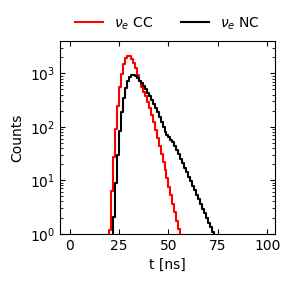

In [6]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

ax.step(
    EventGenerator._ns_grid[:-1], timing_samples_CC[0][121],
    color='r',
    ls='-',
    label=r'$\nu_e$ CC'

)

ax.step(
    EventGenerator._ns_grid[:-1], timing_samples_NC[0][30],
    color='k',
    ls='-',
    label=r'$\nu_e$ NC'

)
# ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
# ax.set_xlim(1e0, 1e1)
ax.set_ylim(1e0, 4e3)
ax.set_yscale('log')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.2))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"t [ns]")
ax.set_ylabel(r"Counts")
# ax.text(2e-1, 2, "Ignore", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

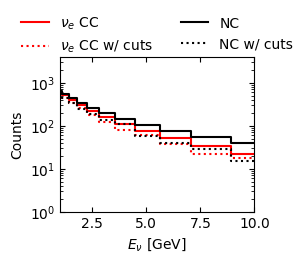

In [7]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

ax.step(
    EventGenerator._energy_grid[10:22],
    EventGenerator._rates['NuE CC'][10:22],
    color='r',
    ls='-',
    label=r'$\nu_e$ CC'

)

ax.step(
    EventGenerator._energy_grid[10:22],
    CC_counts,
    color='r',
    ls=':',
    label=r'$\nu_e$ CC w/ cuts'

)

ax.step(
    EventGenerator._energy_grid[10:22],
    EventGenerator._rates['NuE NC'][10:22] + EventGenerator._rates['NuMu NC'][10:22],
    color='k',
    ls='-',
    label=r'NC'

)

ax.step(
    EventGenerator._energy_grid[10:22],
    NC_counts,
    color='k',
    ls=':',
    label=r'NC w/ cuts'

)

# ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
ax.set_xlim(1e0, 1e1)
ax.set_ylim(1e0, 4e3)
ax.set_yscale('log')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.35))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Counts")
# ax.text(2e-1, 2, "Ignore", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [8]:
cc_ratios = EventGenerator._data_TvsS_test(timing_samples_CC, cuts_CC)
nc_ratios = EventGenerator._data_TvsS_test(timing_samples_NC, cuts_NC)

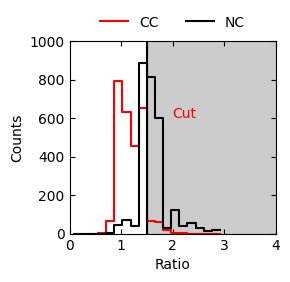

In [9]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

tmp_bins = np.linspace(0, 3, 20)
tmp_centers = (tmp_bins[1:] + tmp_bins[:-1]) / 2

cc_binned, _ = np.histogram(cc_ratios, bins=tmp_bins)
nc_binned, _ = np.histogram(nc_ratios, bins=tmp_bins)

ax.step(
    tmp_centers,
    cc_binned,
    color='r',
    ls='-',
    label=r'CC'
)

ax.step(
    tmp_centers,
    nc_binned,
    color='k',
    ls='-',
    label=r'NC'
)

ax.axvline(np.percentile(nc_ratios, 10), 0, 1e4, color='k')
ax.fill_betweenx([0, 1e4], np.percentile(nc_ratios, 10), 5, color='k', alpha=0.2)

# ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
ax.set_xlim(0, 4)
ax.set_ylim(0, 1e3)
ax.set_yscale('linear')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.2))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"Ratio")
ax.set_ylabel(r"Counts")
ax.text(2, 600, "Cut", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [10]:
# Running a trial analysis
results = EventGenerator._example_analysis(100)

  0%|          | 0/100 [00:00<?, ?it/s]

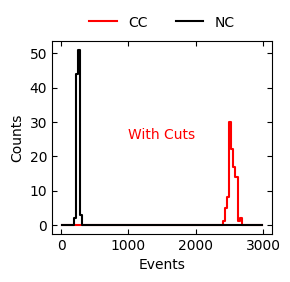

In [14]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

tmp_bins = np.linspace(0, 3000, 100)
tmp_centers = (tmp_bins[1:] + tmp_bins[:-1]) / 2

cc_binned, _ = np.histogram(results[2], bins=tmp_bins)
nc_binned, _ = np.histogram(results[0], bins=tmp_bins)

ax.step(
    tmp_centers,
    cc_binned,
    color='r',
    ls='-',
    label=r'CC'
)

ax.step(
    tmp_centers,
    nc_binned,
    color='k',
    ls='-',
    label=r'NC'
)

# ax.axvline(np.percentile(nc_ratios, 10), 0, 1e4, color='k')
# ax.fill_betweenx([0, 1e4], np.percentile(nc_ratios, 10), 5, color='k', alpha=0.2)

# ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
# ax.set_xlim(0, 4)
# ax.set_ylim(0, 1e3)
ax.set_yscale('linear')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.2))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"Events")
ax.set_ylabel(r"Counts")
ax.text(1000, 25, "With Cuts", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)